In [1]:
%pip install --quiet --upgrade diffusers transformers accelerate invisible_watermark mediapy omegaconf


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.7/354.7 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━

In [16]:
import mediapy as media
import torch
from diffusers import DiffusionPipeline

use_refiner = False  # Set to True if you want to use SDXL Refiner


In [17]:
# @title Model Selection { display-mode: "form" }
model = "hakurei/waifu-diffusion" # @param ["stabilityai/stable-diffusion-xl-base-1.0", "hakurei/waifu-diffusion", "CompVis/stable-diffusion-v1-4"]

pipe = DiffusionPipeline.from_pretrained(
    model,
    torch_dtype=torch.float16,
    safety_checker=None,
    requires_safety_checker=False
).to("cuda")


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [18]:
# @title Prompt & Settings { display-mode: "form" }

prompt = "a cyberpunk city with neon lights and flying cars, hyper-detailed, night scene"  # @param {type:"string"}
negative_prompt = "blurry, low quality, bad anatomy, watermark, distortion"  # @param {type:"string"}
seed = 123456789  # @param {type:"slider", min:0, max:999999999, step:1}
width = 960  # @param {type:"slider", min:64, max:1024, step:64}
height = 640  # @param {type:"slider", min:64, max:1024, step:64}


  0%|          | 0/50 [00:00<?, ?it/s]

""

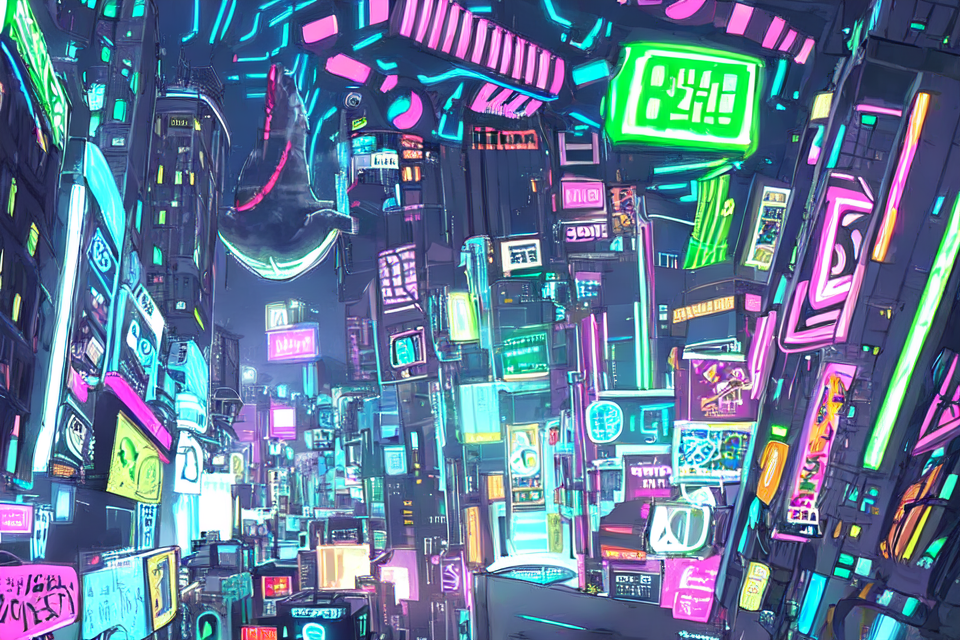

In [19]:
generator = torch.Generator().manual_seed(seed)
images = pipe(
    prompt=prompt,
    width=width,
    height=height,
    negative_prompt=negative_prompt,
    output_type="latent" if use_refiner else "pil",
    generator=generator
).images
media.show_images(images)

""

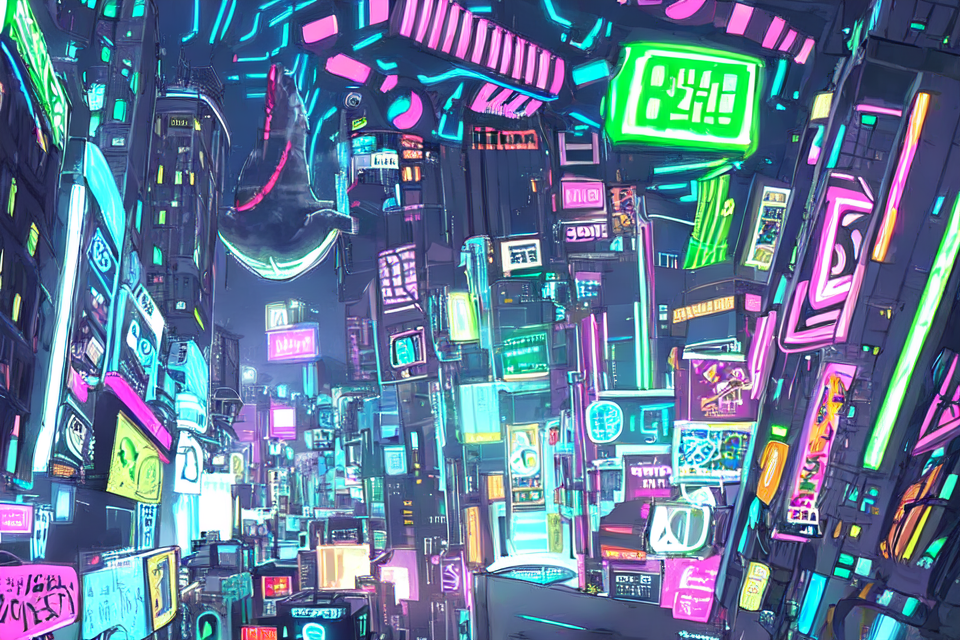

In [20]:
if use_refiner:
    images = refiner(
        prompt=prompt,
        negative_prompt=negative_prompt,
        image=images,
    ).images
media.show_images(images)


In [21]:
pipe.safety_checker = None
pipe.requires_safety_checker = False
